<a href="https://colab.research.google.com/github/KailashPrajapati2303/19it119_19it120_IT450-Galaxy_Classification/blob/main/19IT119_19IT120_galaxy_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import math
import numpy as np
import itertools
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
!pip install astroNN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.3 MB 7.3 MB/s 
     |████████████████████████████████| 4.5 MB 79.5 MB/s 
     |████████████████████████████████| 832 kB 69.0 MB/s 
     |████████████████████████████████| 48 kB 6.2 MB/s 
     |████████████████████████████████| 4.1 MB 66.5 MB/s 
  Created wheel for astroNN: filename=astroNN-1.0.1-py3-none-any.whl size=9284595 sha256=36e712746d22fcc14e70604d3ba487ce342c4345dd6c6a6e16fe316a926a67fb
  Stored in directory: /root/.cache/pip/wheels/26/a4/7e/4cbf2a7f9cd51929da9d09345e8cd37c647b54825a1314dd2d
Successfully built astroNN


In [ ]:
from astroNN.datasets import load_galaxy10

WARNING! APOGEE environment variable SDSS_LOCAL_SAS_MIRROR not set
WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


In [ ]:
images, labels = load_galaxy10()
print(labels)
label = utils.to_categorical(labels, 10)

Galaxy10.h5:  99%|█████████▉| 209M/210M [00:07<00:00, 52.5MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:07, 28.1MB/s]                           


[2 2 4 ... 2 9 2]


In [ ]:
label = label.astype(np.float32)
images = images.astype(np.float32)

In [ ]:
print (labels)
print (label.shape[0])

[2 2 4 ... 2 9 2]
21785


In [ ]:
train_x, test_x = train_test_split(np.arange(labels.shape[0]), test_size = 0.1)
train_images, train_labels, test_images, test_labels = images[train_x], label[train_x], images[test_x], label[test_x]

In [ ]:
print (len(train_x))
print (len(test_x))
print (len(train_labels))

19606
2179
19606


In [ ]:
imageLabel = ["Distirbed", "Merging", "Round Smooth", "In-between Round Smooth", 
              "Cigar Shaped smooth", "Barred Spiral", "Unbarred tight spiral", "Unbared loose spiral", "Edge-on Galaxies without bulge",
              "Edge-on Galacies with Bulge"]

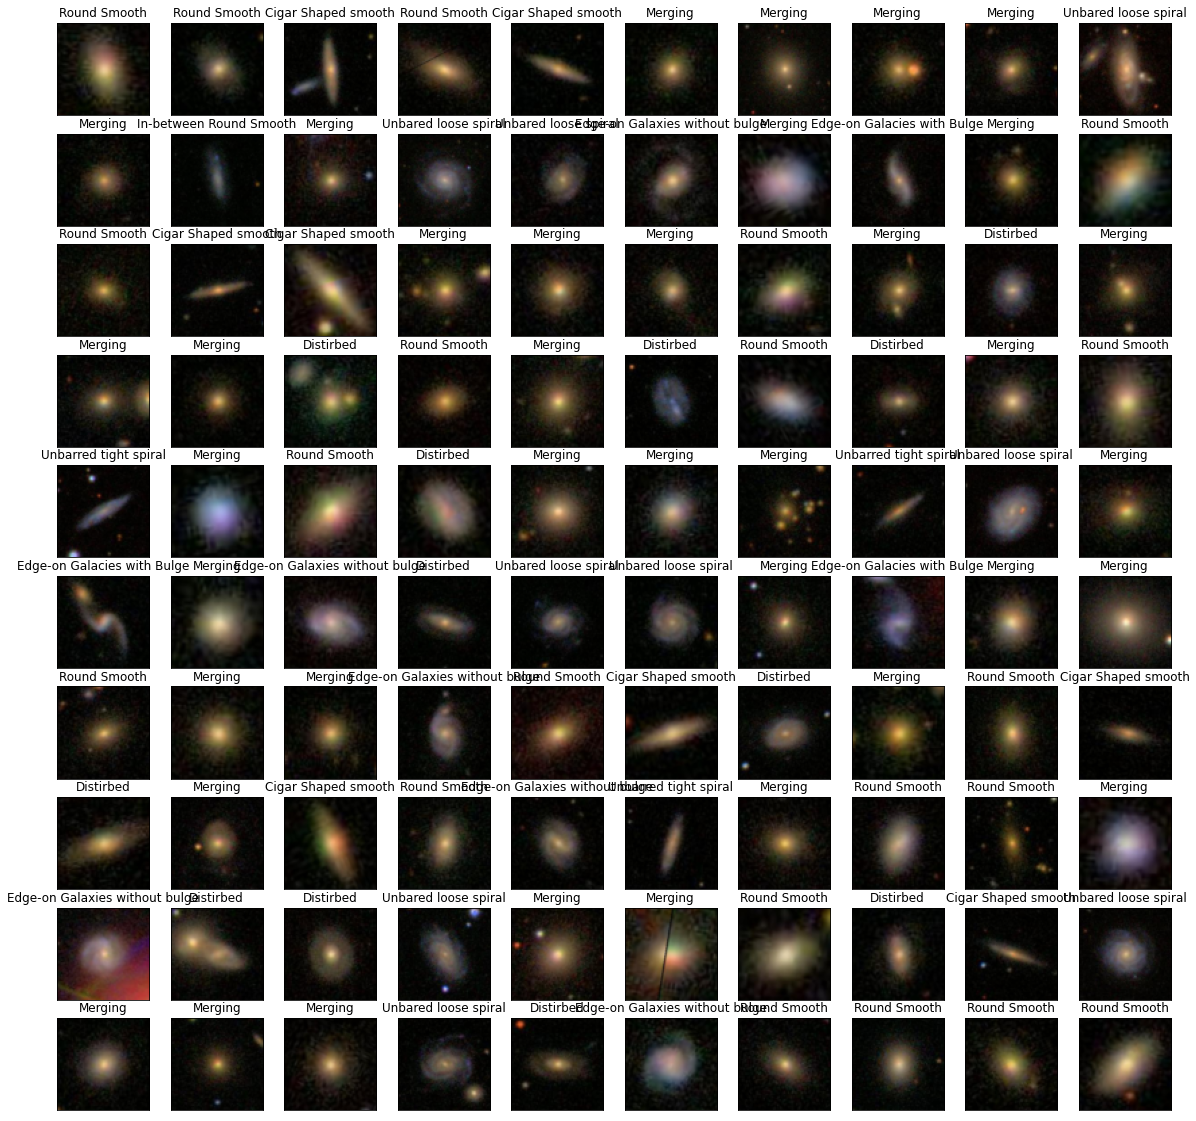

In [ ]:
fig, axes = plt.subplots(ncols = 10, nrows = 10, figsize = (20,20))
index = 0
for i in range(10):
  for j in range(10):
    axes[i,j].set_title(imageLabel[labels[index]])
    axes[i,j].imshow(images[index].astype(np.uint8))
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index +=1
plt.show()

2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
(19606, 69, 69, 3)


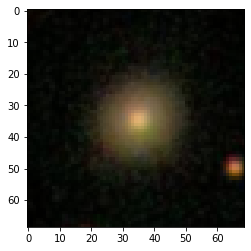

In [ ]:
plt.imshow(train_images[0].astype(np.uint8))
print (labels[0])
print (label[0])
print (train_images.shape)

In [ ]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in train_images])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in test_images])

X_train  = X_train/255
X_test  = X_test/255

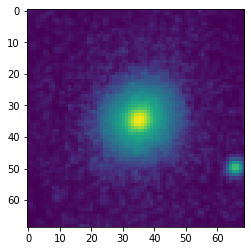

In [ ]:
plt.imshow(X_train[0])

In [ ]:
print(np.shape(X_train))

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

input_shape = (X_train.shape[1], X_train.shape[2], 1)

print(input_shape)

(19606, 69, 69)
(69, 69, 1)


In [ ]:
print (X_train.shape)
print (train_labels.shape)
print (train_labels)

(19606, 69, 69, 1)
(19606, 10)
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=90,
                             zoom_range=0.2,
                             horizontal_flip=True,)

datagen.fit(X_train)

datagen.fit(X_test)

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(len(imageLabel), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 69, 69, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 17, 17, 32)        9

In [ ]:
model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
batch_size=64
history = model.fit(X_train, train_labels, 
                    epochs=30, 
                    steps_per_epoch = int(np.ceil(X_train.shape[0]/ float(64))) , batch_size=32, validation_data=(X_test, test_labels), callbacks=[es])

Epoch 1/30
307/307 [==============================] - 80s 257ms/step - loss: 1.6540 - acc: 0.3669 - val_loss: 1.3317 - val_acc: 0.4635
Epoch 2/30
307/307 [==============================] - 74s 240ms/step - loss: 1.3234 - acc: 0.4970 - val_loss: 1.0608 - val_acc: 0.6131
Epoch 3/30
307/307 [==============================] - 68s 220ms/step - loss: 1.1315 - acc: 0.5925 - val_loss: 0.9209 - val_acc: 0.6677
Epoch 4/30
307/307 [==============================] - 66s 215ms/step - loss: 1.0385 - acc: 0.6229 - val_loss: 0.8258 - val_acc: 0.6916
Epoch 5/30
307/307 [==============================] - 68s 222ms/step - loss: 0.9397 - acc: 0.6656 - val_loss: 0.7735 - val_acc: 0.7067
Epoch 6/30
307/307 [==============================] - 66s 215ms/step - loss: 0.9271 - acc: 0.6668 - val_loss: 0.7833 - val_acc: 0.7067
Epoch 7/30
307/307 [==============================] - 66s 215ms/step - loss: 0.8775 - acc: 0.6818 - val_loss: 0.7193 - val_acc: 0.7315
Epoch 8/30
307/307 [==============================] - 7

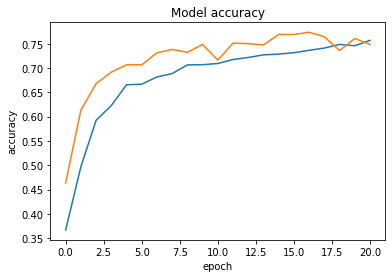

In [ ]:
fig = plt.gcf()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

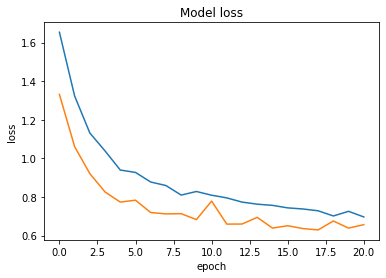

In [ ]:
fig = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

69/69 [==============================] - 4s 56ms/step
[[162   8  17   0   0   0   0  39  49  17]
 [ 56 640  22   0   0   0   0  12   1   0]
 [ 91  61 545   1  16   0   0   9   2   1]
 [  2   0   0   4   1   0   0   0   0   0]
 [  7   1   0  23 154   1   9   0   0   6]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   5  21   0  51   0   0   1]
 [  8   0   0   0   0   0   0  30   2   0]
 [ 24   0   0   0   0   0   0  19  35   6]
 [  7   0   0   1   0   0   0   0   2  10]]


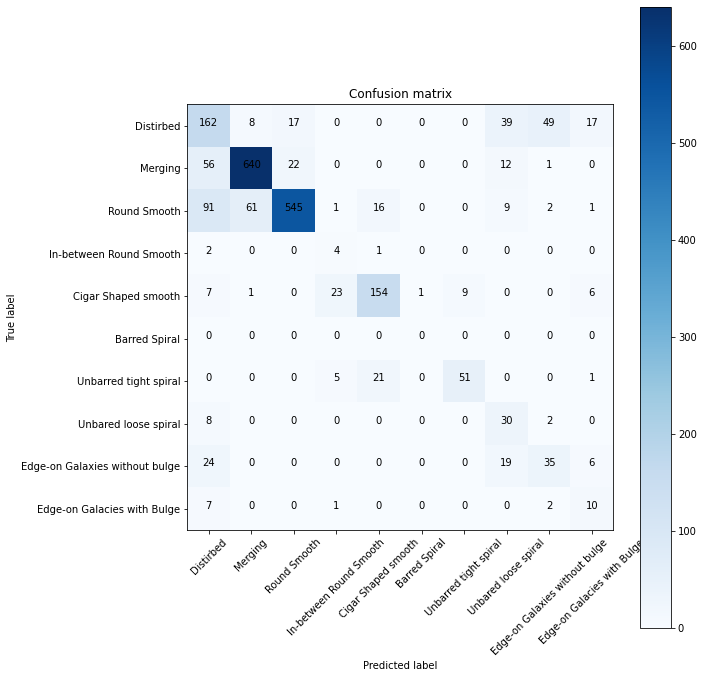

In [ ]:
def plot_confusionM(cm, class_names):
    figure = plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

pred = model.predict(X_test)

pred_label = np.argmax(pred, axis=1)
actual_label = np.argmax(test_labels, axis=1)

cm = confusion_matrix(pred_label+1, actual_label+1)
print (cm)
plot_confusionM(cm, imageLabel)

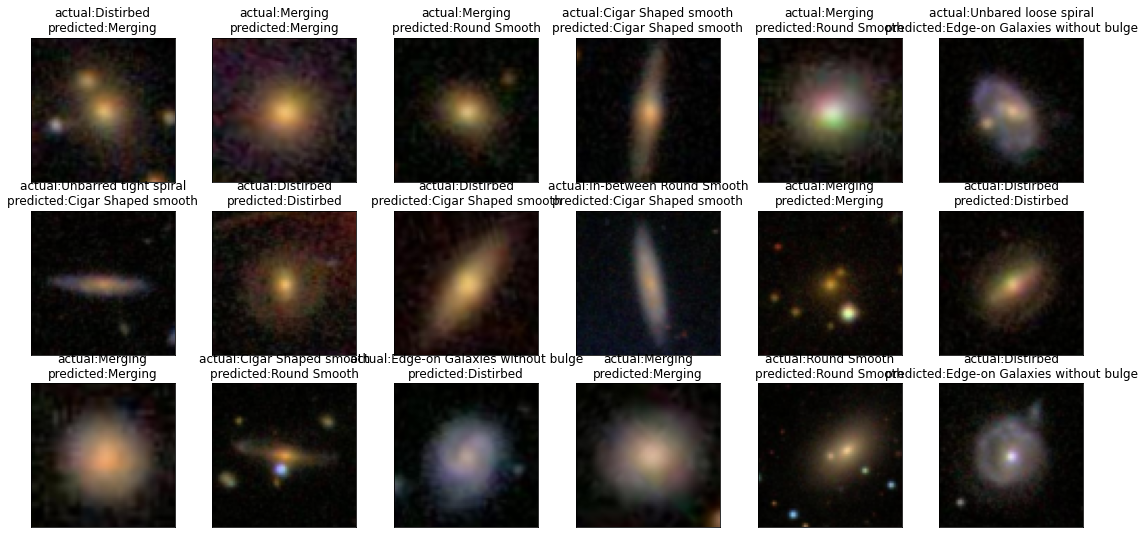

In [ ]:
fig, axes = plt.subplots(ncols=6, nrows=3, sharex=False,
    sharey=True, figsize=(19, 9))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + imageLabel[actual_label[index]] + '\n' 
                            + 'predicted:' + imageLabel[pred_label[index]])
        axes[i,j].imshow(test_images[index].astype(np.uint8), cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()